# **목표: Baseline모델 + 가공한 데이터의 도서추천 예측 RMSE 점수 최대화**

목차:  
0. Baseline 모델 (SVD)
1. 라이브러리 호출  
2. 파일 입력
3. 데이터 정제   
3-1. 결측치 제거   
3-2. 이상치 제거   
3-3. String 데이터 변환    
  3-3-1. Location   
  3-3-2. Book-Title    
  3-3-3. Book-Author     
  3-3-4. Publisher   
4. 상관계수   

# 0. Baseline모델 (SVD) #

In [112]:
!pip install scikit-surprise

In [113]:
import pandas as pd
from surprise import SVD, Dataset, Reader, accuracy

In [114]:
### 여기만 변경 ###
train = pd.read_csv('/content/sample_data/new_train_2.csv')
### 여기 아래는 변경 X ###

test = pd.read_csv('/content/sample_data/test.csv')
# Surprise 라이브러리용 Reader 및 Dataset 객체 생성
reader = Reader(rating_scale=(0, 10))
train = Dataset.load_from_df(train[['User-ID', 'Book-ID', 'Book-Rating']], reader)
train = train.build_full_trainset()
train
# SVD 모델 훈련
model = SVD()
model.fit(train)
submit = pd.read_csv('/content/sample_data/sample_submission.csv')
submit['Book-Rating'] = test.apply(lambda row: model.predict(row['User-ID'], row['Book-ID']).est, axis=1)
submit.to_csv('./baseline_submit.csv', index=False)

## A) Baseline모델 + Raw Data 점수: 3.70427

# 1. 라이브러리 호출 #

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# 2. 파일 입력 #

In [116]:
df = pd.read_csv("/content/sample_data/train.csv")

In [117]:
df

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr


# 3. 데이터 정제 #

In [118]:
df.keys()

Index(['ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age', 'Location',
       'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'],
      dtype='object')

## Train Data의 키 값   
ID: 데이터 아이디   
User-ID: 사용자 아이디   
Book-ID: 책 아이디   
Book-Rating: 책 평점 (0~10점)   
Age: 사용자 나이   
Location: 사용자 지역   
Book-Title: 도서 명   
Book-Author: 도서 저자   
Year-Of-Publication: 도서 출판 년도 (-1일 경우 결측 혹은 알 수 없음)    
Publisher: 출판사   


## 3-1. 결측치 제거

In [119]:
null_counts = df.isnull().sum()

In [120]:
null_counts

ID                     0
User-ID                0
Book-ID                0
Book-Rating            0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

### 명시적인 결측치는 없다. 그러나 이상치에 대한 확인이 필요하다.

### *Idea-1) 제공된 결측치 기준을 먼저 확인하자*  
### *Solution-1) Year-Of-Publication의 값이 -1인 경우를 확인하자*

In [121]:
df[df['Year-Of-Publication']==-1]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
184,TRAIN_000184,USER_00049,BOOK_121460,0,37.0,"gaylord, michigan, usa",Bxc Blue Bay Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc
186,TRAIN_000186,USER_00049,BOOK_175661,10,37.0,"gaylord, michigan, usa",Lighthouse Mystery,Gertrude C Warner,-1.0,Scholastic Inc
191,TRAIN_000191,USER_00049,BOOK_230275,0,37.0,"gaylord, michigan, usa",Mike's Mystery,Gertrude Cha Warner,-1.0,Scholastic Inc
231,TRAIN_000231,USER_00054,BOOK_122689,0,39.0,"spring, texas, usa",Charming Billy,Alice Mcdermott,-1.0,"Farrar, Straus Giroux"
290,TRAIN_000290,USER_00060,BOOK_165427,0,27.0,"los angeles, california, usa",Moon Palace,Paul Auster,-1.0,Faber Faber Inc
...,...,...,...,...,...,...,...,...,...,...
870700,TRAIN_870700,USER_92056,BOOK_093874,5,35.0,"leucadia, california, usa",High Ground,John Mcgahern,-1.0,Faber Faber Inc
870751,TRAIN_870751,USER_92058,BOOK_117063,0,24.0,"halifax, nova scotia, canada",Hotel Du Lac,Anita Brookner,-1.0,Penguin Putnam~trade
870776,TRAIN_870776,USER_92058,BOOK_181486,8,24.0,"halifax, nova scotia, canada",Laurels Kitchen a Handbook for Vegetarian Co,Laurel Robertson,-1.0,Bantam Doubleday Dell
870895,TRAIN_870895,USER_92080,BOOK_045027,10,35.0,"brookhaven, mississippi, usa",Best of Sisters In Crime,Marilyn Wallace,-1.0,Penguin Putnam~childrens Hc


### *Idea-1-1) 11515개는 전체 데이터에 비해 작은 양이다.*  
### *Solution-1-1) 결측치를 포함한 값을 제거하자*

In [122]:
null_deleted_df = df[df['Year-Of-Publication']!=-1].reset_index(drop=True)

In [123]:
null_deleted_df

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book
...,...,...,...,...,...,...,...,...,...,...
859873,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,"minneapolis, minnesota, usa",Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins
859874,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,"temple, texas, usa",The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony
859875,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,"ottawa, ontario, canada",Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press
859876,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,"maple grove, minnesota, usa",Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr


In [124]:
null_deleted_df.to_csv('new_train.csv',index=False)

## B-1) Baseline모델 + 결측치 단순 제거 Data 점수: 3.49383

### *Idea-1-2) 결측치를 대체할 수 있는 다른 방법을 시도해서 결과를 비교하자*  
### *Solution-1-1) 평균값으로 대체하자*

In [125]:
year_mean = int(null_deleted_df['Year-Of-Publication'].mean())

In [126]:
df.loc[df['Year-Of-Publication']==-1.0,'Year-Of-Publication'] = year_mean

In [127]:
df[df['Year-Of-Publication']==-1]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [128]:
df.to_csv("new_train_2.csv",index=False)

## B-2) Baseline모델 + 결측치 평균값 대체 Data 점수: 3.49092


## Result) B-2 안을 채택 (결측치 평균값 대체)

## 3-2. 이상치 제거

### *Idea-1) 이상치는 시각적으로 확인이 가능하다*  
### *Solution-1) 수치로 된 Age와 Year-Of-Publication의 분포를 확인하자*

In [129]:
print(df['Age'].describe())

count    871393.000000
mean         36.799861
std          12.065509
min           0.000000
25%          31.000000
50%          35.000000
75%          41.000000
max         244.000000
Name: Age, dtype: float64


In [130]:
print(df['Year-Of-Publication'].describe())

count    871393.000000
mean       1995.279428
std           7.326930
min        1376.000000
25%        1992.000000
50%        1997.000000
75%        2001.000000
max        2021.000000
Name: Year-Of-Publication, dtype: float64


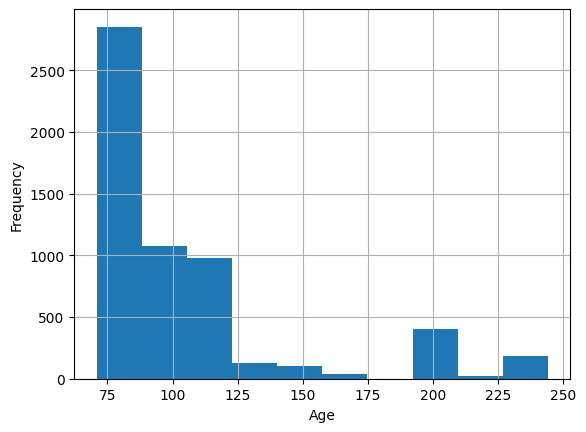

In [131]:
df.loc[df['Age']>70,'Age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### *Idea-1-2) 나이에 대한 이상치가 존재한다*  
### *Solution-1-2) 90세 이상의 리뷰를 죄송하지만 삭제하자*

In [132]:
df = df[df['Age']<90]

In [133]:
df.to_csv("new_train_3.csv",index=False)

## B-1) Baseline모델 + 결측치 평균값 대체 + 나이 이상치 제거 Data 점수:

### *Idea-1-3) 책 연도에 이상치가 존재할 수 있을까?*  
### *Solution-1-3) 특정 년도 이하의 값들을 확인해보자*

In [134]:
df[df['Year-Of-Publication']<1900]

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
197155,TRAIN_197155,USER_21146,BOOK_258689,10,29.0,"tehran, tehran, iran",Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378.0,Intisharat-i Quqnus
513235,TRAIN_513235,USER_54733,BOOK_012188,5,35.0,"honolulu, hawaii, usa","Complete Works 10 Volumes [2,6,7,8,9] (Notable...",Benjamin Franklin,1806.0,Reprint Services Corp
569994,TRAIN_569994,USER_58401,BOOK_228632,4,27.0,"tehran, n/a, iran",Tasht-i khun,IsmaÂ°il Fasih,1376.0,Nashr-i Alburz
598476,TRAIN_598476,USER_62057,BOOK_130109,0,56.0,"raleigh, north carolina, usa","Hugh Wynne, Free Quaker (2 Volumes (BCL1-PS Am...",Silas Weir Mitchell,1897.0,Reprint Services Corp


## Result) 연도에는 이상치가 없다고 판단하고, 나이 이상치를 제거한 값을 선택한다.

## 3-3. String 데이터 변환

### 3-3-1. Location 수치화

In [135]:
num_unique_loc = df['Location'].nunique()

In [136]:
num_unique_loc

20937

### Idea-1) 원-핫 인코딩으로 범주화하기에는 범주가 너무 방대하다.
### Solution-1) 라벨 인코딩을 시도해보자

In [137]:
label_encoder = LabelEncoder()
df['Location'] = label_encoder.fit_transform(df['Location'])

<ipython-input-137-622493ad0f22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Location'] = label_encoder.fit_transform(df['Location'])


### 3-3-2. Book Title 수치화

In [138]:
num_unique_title = df['Book-Title'].nunique()

In [139]:
num_unique_title

217485

### Idea-1) Title 값 역시 중복 값이 존재한다.
### Solution-1) 라벨 인코딩을 시도해보자.

In [140]:
df['Book-Title'] = label_encoder.fit_transform(df['Book-Title'])

<ipython-input-140-41efd9bf166b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Book-Title'] = label_encoder.fit_transform(df['Book-Title'])


### 3-3-3. Book Author 수치화

In [143]:
num_unique_author = df['Book-Author'].nunique()

In [144]:
num_unique_author

92472

In [145]:
df['Book-Author'] = label_encoder.fit_transform(df['Book-Author'])

<ipython-input-145-ceb0fad1630c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Book-Author'] = label_encoder.fit_transform(df['Book-Author'])


### 3-3-4. Publisher 수치화

In [147]:
num_unique_publisher = df['Publisher'].nunique()

In [148]:
num_unique_publisher

15470

In [150]:
df['Publisher'] = label_encoder.fit_transform(df['Publisher'])

<ipython-input-150-c172c601ea06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Publisher'] = label_encoder.fit_transform(df['Publisher'])


In [151]:
df

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,15998,136026,77339,2001.0,9069
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,15998,102901,91489,1981.0,10490
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,15998,207988,89946,1981.0,10490
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,15998,111579,83608,1991.0,1164
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,15998,143756,54066,1989.0,12579
...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,11822,73367,51906,1993.0,6149
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,18368,185884,16842,2002.0,6078
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,13879,72639,36752,2000.0,13668
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,11096,73719,86861,1996.0,12959


## Result) Location, Book-Title, Book-Author, Publisher 정보 범주화

# 4. 상관계수

In [152]:
cor_relation = df.corr()

<ipython-input-152-67ee27125f0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_relation = df.corr()


In [157]:
cor_relation

,Book-Rating,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher
Book-Rating,1.000000,-0.029229,-0.003108,-1.116018e-04,-0.003644,3.668983e-02,-0.000665
Age,-0.029229,1.000000,-0.006008,4.655787e-03,0.000508,-1.724737e-02,-0.009940
Location,-0.003108,-0.006008,1.000000,3.762850e-03,0.001251,-4.858215e-03,-0.000890
Book-Title,-0.000112,0.004656,0.003763,1.000000e+00,0.006980,-7.866719e-07,0.006582
Book-Author,-0.003644,0.000508,0.001251,6.979772e-03,1.000000,-1.111687e-03,0.034868
Year-Of-Publication,0.036690,-0.017247,-0.004858,-7.866719e-07,-0.001112,1.000000e+00,0.047779
Publisher,-0.000665,-0.009940,-0.000890,6.582380e-03,0.034868,4.777890e-02,1.000000


In [158]:
cor_relation['Book-Rating']

Book-Rating            1.000000
Age                   -0.029229
Location              -0.003108
Book-Title            -0.000112
Book-Author           -0.003644
Year-Of-Publication    0.036690
Publisher             -0.000665
Name: Book-Rating, dtype: float64

### Idea-1) predictY값인 Book-Rating과 상관계수가 상대적으로 낮은 값이 존재한다.
### Solution-1) 해당 값을 제거하자.

In [160]:
df = df.drop(columns=['Book-Title','Publisher'])

In [161]:
df

,ID,User-ID,Book-ID,Book-Rating,Age,Location,Book-Author,Year-Of-Publication
0,TRAIN_000000,USER_00000,BOOK_044368,8,23.0,15998,77339,2001.0
1,TRAIN_000001,USER_00000,BOOK_081205,8,23.0,15998,91489,1981.0
2,TRAIN_000002,USER_00000,BOOK_086781,0,23.0,15998,89946,1981.0
3,TRAIN_000003,USER_00000,BOOK_098622,0,23.0,15998,83608,1991.0
4,TRAIN_000004,USER_00000,BOOK_180810,8,23.0,15998,54066,1989.0
...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,0,34.0,11822,51906,1993.0
871389,TRAIN_871389,USER_92097,BOOK_258124,0,35.0,18368,16842,2002.0
871390,TRAIN_871390,USER_92098,BOOK_071848,0,45.0,13879,36752,2000.0
871391,TRAIN_871391,USER_92099,BOOK_252599,8,43.0,11096,86861,1996.0


### 개선할 점)
1. Baseline 모델의 설계가 올바른가? - 현재 Baseline 모델이 'User-ID', 'Book-ID', 'Book-Rating'만 반영하고 있는건 아닌가.
2. 채점 가능 횟수가 너무 적음.

### 궁금한 점)
1. Test Data에 대해서 동일한 전처리를 어떻게 진행하는지?
2. 범주화를 정상적으로 진행한 것이 맞는지?